<a href="https://colab.research.google.com/github/dspark0419/DATA-205/blob/main/Project_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import random
import math

In [2]:
import json
import requests

# **Dataset: MD Zip Codes Tabulation Areas (ZCTA)**

In [3]:
mdZcta = pd.read_csv('Maryland_Census_Data_-_ZIP_Code_Tabulation_Areas_(ZCTAs).csv')

In [4]:
mdZcta.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P
0,1,20601,24,2420601,B5,G6350,S,20601,24,115635266,387684,24156,8722,9785,11146,155,880,11,48,849,1282,40.5,46.1,0.6,3.6,0.0,0.2,3.5,5.3,1922,8.0,37.3,376,4.3,71.1,11.2,19.9,30.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
1,2,20602,24,2420602,B5,G6350,S,20602,24,35830723,352762,24955,9736,8466,13054,116,731,15,58,999,1516,33.9,52.3,0.5,2.9,0.1,0.2,4.0,6.1,1964,7.9,32.6,769,7.9,59.7,9.0,34.4,43.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
2,3,20603,24,2420603,B5,G6350,S,20603,24,44239637,219356,28967,10317,9625,15025,98,1446,24,65,1091,1593,33.2,51.9,0.3,5.0,0.1,0.2,3.8,5.5,1400,4.8,34.5,531,5.1,73.8,4.7,22.6,29.9,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
3,4,20606,24,2420606,B5,G6350,S,20606,24,7501011,1248760,431,230,377,45,1,4,0,0,0,4,87.5,10.4,0.2,0.9,0.0,0.0,0.0,0.9,108,25.1,49.1,15,6.5,49.7,39.3,18.1,31.2,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
4,5,20607,24,2420607,B5,G6350,S,20607,24,54357590,448221,9802,3504,2165,6321,33,560,3,6,234,480,22.1,64.5,0.3,5.7,0.0,0.1,2.4,4.9,847,8.6,40.9,172,4.9,83.1,10.3,7.4,22.1,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...


In [5]:
#mdZcta.isnull().sum()

In [6]:
# check if the two columns of representing zip codes are identical
mdZcta[mdZcta['ZCTA5CE10'] != mdZcta['ZCTA5N']].shape

(0, 40)

# **Dataset: MC Map for Zip Codes**

In [7]:
!pip install geopandas
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
!pip install adjustText
import adjustText as aT

In [8]:
mcZipMap = gpd.read_file('ZipCode_2017.shp')

In [9]:
mcZipMap.head()

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry
0,336,20707,LAUREL,MD,3.406347e+08,"POLYGON ((-76.88764 39.13193, -76.88766 39.131..."
1,404,20777,HIGHLAND,MD,2.077615e+08,"POLYGON ((-76.97442 39.19969, -76.97371 39.198..."
2,413,20833,BROOKEVILLE,MD,5.679860e+07,"MULTIPOLYGON (((-77.06566 39.27010, -77.06462 ..."
3,414,20866,BURTONSVILLE,MD,3.506130e+04,"POLYGON ((-76.89065 39.13044, -76.89069 39.130..."
4,415,20868,SPENCERVILLE,MD,5.180459e+04,"POLYGON ((-76.94830 39.12929, -76.94831 39.129..."


In [10]:
# find the representative points. may use centroid instead of representative_point()
mcZipMap['center'] = mcZipMap['geometry'].representative_point()

In [11]:
mcZipMap.head()

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
0,336,20707,LAUREL,MD,3.406347e+08,"POLYGON ((-76.88764 39.13193, -76.88766 39.131...",POINT (-76.88158 39.09424)
1,404,20777,HIGHLAND,MD,2.077615e+08,"POLYGON ((-76.97442 39.19969, -76.97371 39.198...",POINT (-76.97506 39.17294)
2,413,20833,BROOKEVILLE,MD,5.679860e+07,"MULTIPOLYGON (((-77.06566 39.27010, -77.06462 ...",POINT (-77.05486 39.24741)
3,414,20866,BURTONSVILLE,MD,3.506130e+04,"POLYGON ((-76.89065 39.13044, -76.89069 39.130...",POINT (-76.88959 39.13114)
4,415,20868,SPENCERVILLE,MD,5.180459e+04,"POLYGON ((-76.94830 39.12929, -76.94831 39.129...",POINT (-76.95363 39.13169)


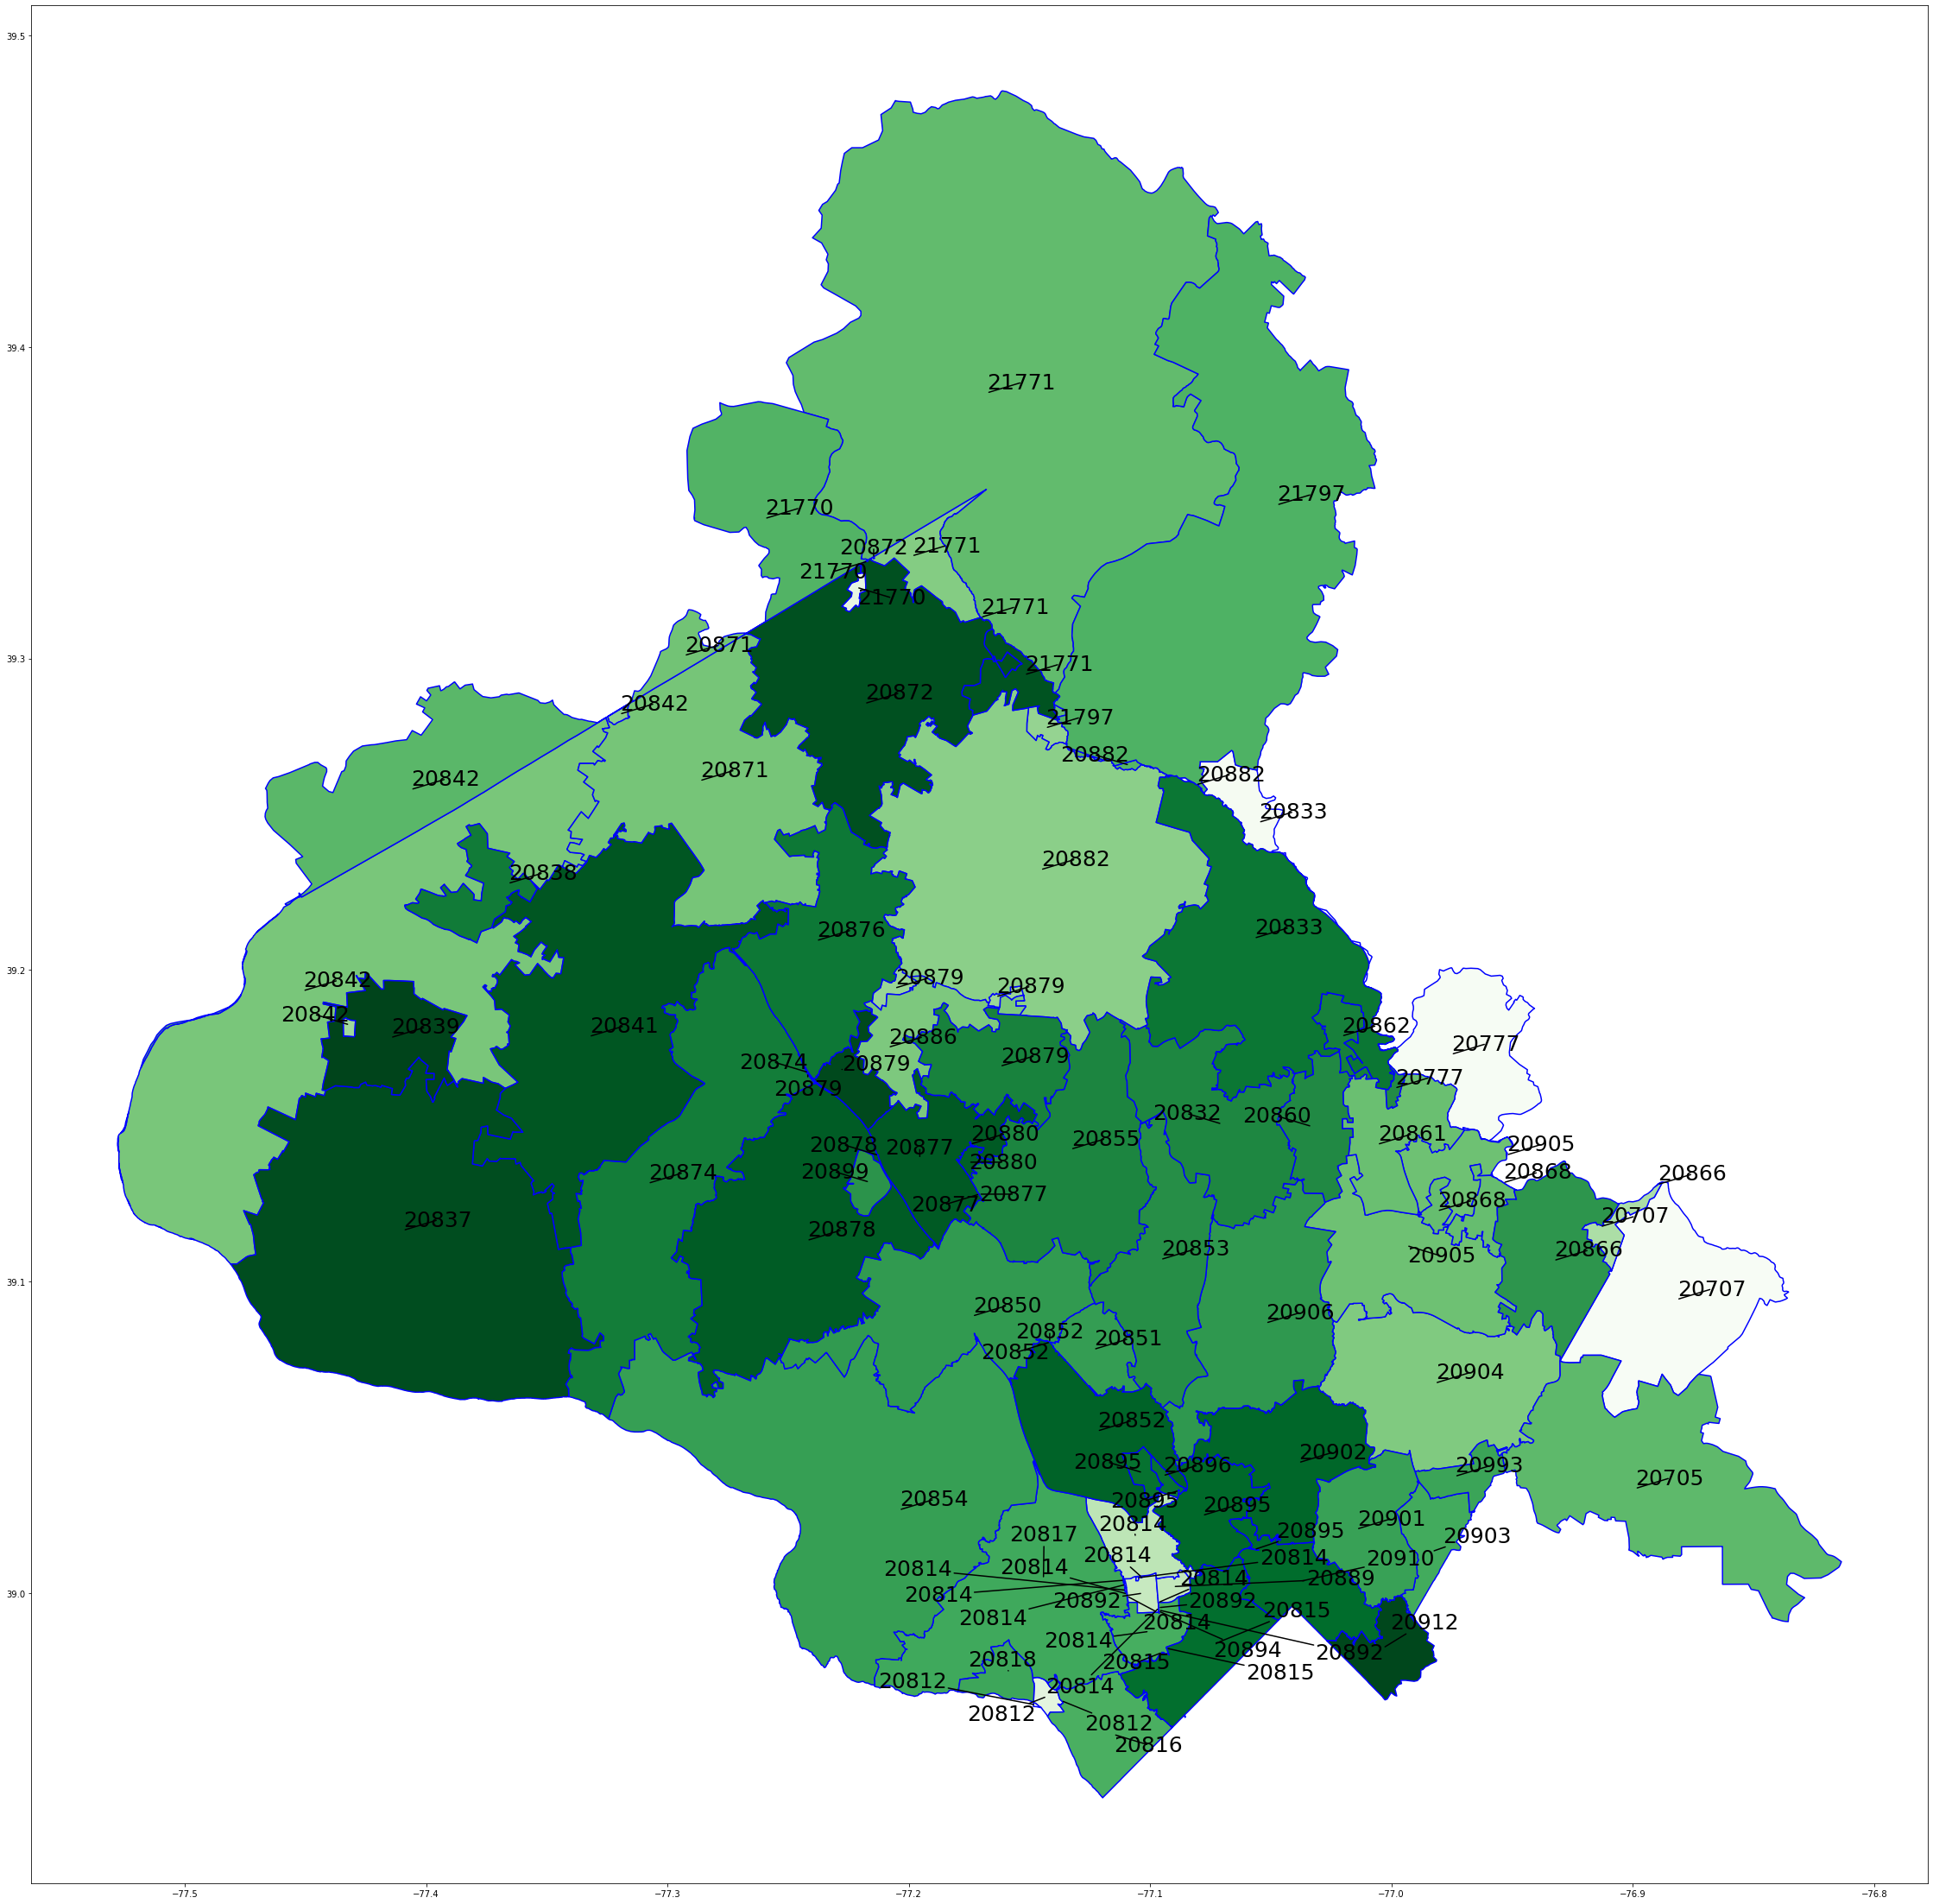

In [12]:
# plot the basemap
mcZipMap.plot(figsize=(40, 40), cmap='Greens', edgecolor='blue', linewidth=1.5)

texts = []

# annotate the zip codes
for x, y, label in zip(mcZipMap.center.x, mcZipMap.center.y, mcZipMap['ZIPCODE']):
  texts.append(plt.text(x, y, label, fontsize = 25))

# adjust texts
aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1),
               arrowprops=dict(arrowstyle='-', color='black', lw=1.5))
plt.show()

In [13]:
# I think the bottom-right zip code 20993 is 20903.
mcZipMap['ZIPCODE'] = mcZipMap['ZIPCODE'].replace(20993, 20903)

In [14]:
mcZipMap.duplicated().sum()

0

In [15]:
mcZipMap['ZIPCODE'].nunique()

54

In [16]:
#pd.crosstab(mcZipMap['ZIPCODE'], columns='count')

In [17]:
pobox = [20813, 20824, 20825, 20827, 20830, 20847, 20848, 20849, 20859, 20875, 20883, 20884, 20885, 
         20891, 20898, 20907, 20908, 20911, 20913, 20914, 20915, 20916, 20918] #20880, 20896
len(pobox)

23

In [18]:
single_entity = [20810, 20811, 20857, 20894, 20897, 20993, 20997] #20889, 20899, 20892
len(single_entity)

7

In [19]:
nonstd_zip = pobox + single_entity

In [20]:
stdZip = mcZipMap[~mcZipMap['ZIPCODE'].isin(nonstd_zip)]

In [21]:
stdZip['ZIPCODE'].nunique()

53

## **Removing unnecessary zip codes**

In [22]:
stdZip[stdZip['ZIPCODE'] == 20878]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
36,695,20878,GAITHERSBURG,MD,3.493518e+03,"POLYGON ((-77.21251 39.14052, -77.21260 39.140...",POINT (-77.21265 39.14053)
95,871,20878,GAITHERSBURG,MD,5.665708e+08,"POLYGON ((-77.23599 39.16218, -77.23592 39.162...",POINT (-77.24202 39.11319)


In [23]:
stdZip[stdZip['ZIPCODE'] == 20842]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
39,698,20842,DICKERSON,MD,2.759828e+06,"POLYGON ((-77.42960 39.17884, -77.42980 39.178...",POINT (-77.43185 39.18239)
44,841,20842,DICKERSON,MD,3.121267e+06,"POLYGON ((-77.31586 39.28543, -77.31608 39.284...",POINT (-77.31968 39.28213)
50,849,20842,DICKERSON,MD,1.135536e+09,"POLYGON ((-77.32546 39.27756, -77.32559 39.277...",POINT (-77.45088 39.19332)
58,811,20842,DICKERSON,MD,3.959792e+08,"MULTIPOLYGON (((-77.38820 39.29250, -77.38595 ...",POINT (-77.40618 39.25794)


In [24]:
stdZip[stdZip['ZIPCODE'] == 20871]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
51,850,20871,CLARKSBURG,MD,5.782691e+08,"POLYGON ((-77.26385 39.29588, -77.26407 39.295...",POINT (-77.28644 39.26078)
52,851,20871,CLARKSBURG,MD,3.774081e+07,"POLYGON ((-77.28678 39.31278, -77.28505 39.312...",POINT (-77.29289 39.30096)


In [25]:
stdZip[stdZip['ZIPCODE'] == 21770]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
12,707,21770,MONROVIA,MD,5.994021e+06,"POLYGON ((-77.21802 39.32732, -77.21784 39.323...",POINT (-77.22139 39.32278)
46,843,21770,MONROVIA,MD,1.205979e+04,"POLYGON ((-77.21686 39.33128, -77.21723 39.331...",POINT (-77.21716 39.33117)
60,814,21770,MONROVIA,MD,3.107496e+08,"POLYGON ((-77.25632 39.38179, -77.25007 39.380...",POINT (-77.25953 39.34492)


In [26]:
stdZip[stdZip['ZIPCODE'] == 21771]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
43,702,21771,MT AIRY,MD,1.021610e+03,"POLYGON ((-77.16996 39.31321, -77.17018 39.313...",POINT (-77.17009 39.31320)
47,844,21771,MT AIRY,MD,6.238017e+07,"POLYGON ((-77.18024 39.34648, -77.18036 39.346...",POINT (-77.19857 39.33293)
56,809,21771,MT. AIRY,MD,2.272783e+09,"MULTIPOLYGON (((-77.15554 39.48052, -77.15267 ...",POINT (-77.16750 39.38527)
98,874,21771,MT AIRY,MD,5.397654e+07,"POLYGON ((-77.16415 39.30730, -77.16404 39.307...",POINT (-77.15190 39.29480)


In [27]:
stdZip[stdZip['ZIPCODE'] == 21797]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
42,701,21797,WOODBINE,MD,1.351050e+07,"POLYGON ((-77.13810 39.27948, -77.13797 39.279...",POINT (-77.14323 39.27773)
61,815,21797,WOODBINE,MD,1.242928e+09,"POLYGON ((-77.07247 39.43968, -77.07203 39.439...",POINT (-77.04737 39.34930)


In [28]:
stdZip[stdZip['ZIPCODE'] == 20872]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
13,708,20872,DAMASCUS,MD,3.045181e+04,"POLYGON ((-77.21496 39.33247, -77.21451 39.332...",POINT (-77.21455 39.33232)
99,875,20872,DAMASCUS,MD,5.424677e+08,"POLYGON ((-77.21790 39.33113, -77.21733 39.331...",POINT (-77.21813 39.28556)


In [29]:
stdZip[stdZip['ZIPCODE'] == 20882]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
5,416,20882,GAITHERSBURG,MD,3.806057e+02,"POLYGON ((-77.08053 39.25937, -77.08046 39.259...",POINT (-77.08083 39.25946)
45,842,20882,GAITHERSBURG,MD,1.010405e+09,"POLYGON ((-77.15684 39.28508, -77.15692 39.283...",POINT (-77.14524 39.23220)
59,812,20882,GAITHERSBURG,MD,3.472351e+06,"MULTIPOLYGON (((-77.11474 39.26552, -77.10581 ...",POINT (-77.10875 39.26577)


In [30]:
stdZip[stdZip['ZIPCODE'] == 20833]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
2,413,20833,BROOKEVILLE,MD,5.679860e+07,"MULTIPOLYGON (((-77.06566 39.27010, -77.06462 ...",POINT (-77.05486 39.24741)
86,840,20833,BROOKEVILLE,MD,5.568872e+08,"POLYGON ((-77.09291 39.26237, -77.09266 39.261...",POINT (-77.05673 39.21024)


In [31]:
stdZip[stdZip['ZIPCODE'] == 20777]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
1,404,20777,HIGHLAND,MD,2.077615e+08,"POLYGON ((-76.97442 39.19969, -76.97371 39.198...",POINT (-76.97506 39.17294)
77,831,20777,HIGHLAND,MD,5.643254e+06,"POLYGON ((-77.00054 39.16932, -77.00038 39.169...",POINT (-76.99845 39.16212)


In [32]:
stdZip[stdZip['ZIPCODE'] == 20866]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
3,414,20866,BURTONSVILLE,MD,3.506130e+04,"POLYGON ((-76.89065 39.13044, -76.89069 39.130...",POINT (-76.88959 39.13114)
73,827,20866,BURTONSVILLE,MD,2.017397e+08,"POLYGON ((-76.92832 39.13864, -76.92820 39.138...",POINT (-76.93257 39.10675)


In [33]:
stdZip[stdZip['ZIPCODE'] == 20707]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
0,336,20707,LAUREL,MD,3.406347e+08,"POLYGON ((-76.88764 39.13193, -76.88766 39.131...",POINT (-76.88158 39.09424)
35,694,20707,LAUREL,MD,2.188329e+07,"POLYGON ((-76.88776 39.13176, -76.89107 39.127...",POINT (-76.91335 39.11759)


In [34]:
stdZip[stdZip['ZIPCODE'] == 20705]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
57,807,20705,BELTSVILLE,MD,5.499108e+08,"POLYGON ((-76.91305 39.07632, -76.90484 39.074...",POINT (-76.89885 39.03356)


In [35]:
stdZip[stdZip['ZIPCODE'] == 20852]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
31,690,20852,ROCKVILLE,MD,6.546992e+02,"POLYGON ((-77.14140 39.08050, -77.14143 39.080...",POINT (-77.14147 39.08051)
32,691,20852,ROCKVILLE,MD,2.912755e+02,"POLYGON ((-77.14156 39.08053, -77.14156 39.080...",POINT (-77.14160 39.08054)
93,869,20852,ROCKVILLE,MD,2.281738e+08,"POLYGON ((-77.14585 39.08157, -77.14470 39.081...",POINT (-77.12172 39.05203)


In [36]:
stdZip[stdZip['ZIPCODE'] == 20815]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
8,703,20815,CHEVY CHASE,MD,8.374775e+02,"POLYGON ((-77.09501 38.98087, -77.09512 38.980...",POINT (-77.09503 38.98090)
9,704,20815,CHEVY CHASE,MD,2.157300e+01,"POLYGON ((-77.09319 38.98225, -77.09320 38.982...",POINT (-77.09320 38.98224)
89,865,20815,CHEVY CHASE,MD,1.519956e+08,"POLYGON ((-77.06283 39.01179, -77.06238 39.011...",POINT (-77.07184 38.98413)


In [37]:
stdZip[stdZip['ZIPCODE'] == 20814]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
11,706,20814,BETHESDA,MD,1.855469e-02,"POLYGON ((-77.09643 38.99518, -77.09643 38.995...",POINT (-77.09643 38.99518)
18,677,20814,BETHESDA,MD,3.187317e+00,"POLYGON ((-77.09662 38.99691, -77.09662 38.996...",POINT (-77.09662 38.99691)
19,678,20814,BETHESDA,MD,2.148831e+04,"POLYGON ((-77.10927 38.99819, -77.10947 38.998...",POINT (-77.10947 38.99894)
20,679,20814,BETHESDA,MD,1.202278e+04,"POLYGON ((-77.10948 38.99960, -77.10945 38.999...",POINT (-77.10958 38.99969)
21,680,20814,BETHESDA,MD,1.191660e+05,"POLYGON ((-77.10955 39.00013, -77.11023 39.000...",POINT (-77.11007 39.00088)
22,681,20814,BETHESDA,MD,1.292050e+05,"POLYGON ((-77.11011 39.00320, -77.11002 39.002...",POINT (-77.11033 39.00268)
23,682,20814,BETHESDA,MD,6.318292e+04,"POLYGON ((-77.11047 39.00410, -77.11026 39.003...",POINT (-77.11082 39.00408)
24,683,20814,BETHESDA,MD,1.544222e+05,"POLYGON ((-77.10487 39.00418, -77.10500 39.003...",POINT (-77.10532 39.00485)
25,684,20814,BETHESDA,MD,3.290944e+04,"POLYGON ((-77.10259 39.00531, -77.10373 39.004...",POINT (-77.10346 39.00505)
29,688,20814,BETHESDA,MD,6.872786e+07,"POLYGON ((-77.09606 39.03256, -77.09537 39.032...",POINT (-77.10615 39.01850)


In [38]:
stdZip[stdZip['ZIPCODE'] == 20892]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
16,675,20892,BETHESDA,MD,7.448754e+02,"POLYGON ((-77.09646 38.99534, -77.09643 38.995...",POINT (-77.09648 38.99528)
17,676,20892,BETHESDA,MD,7.436283e+03,"POLYGON ((-77.09624 38.99361, -77.09625 38.993...",POINT (-77.09639 38.99450)
26,685,20892,BETHESDA,MD,1.383493e+07,"POLYGON ((-77.09662 38.99691, -77.09662 38.996...",POINT (-77.10323 38.99991)


In [39]:
stdZip[stdZip['ZIPCODE'] == 20895]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
28,687,20895,KENSINGTON,MD,2.056850e+04,"POLYGON ((-77.05489 39.01381, -77.05497 39.013...",POINT (-77.05671 39.01395)
30,689,20895,KENSINGTON,MD,1.716628e+04,"POLYGON ((-77.08787 39.03276, -77.08815 39.032...",POINT (-77.08812 39.03286)
88,861,20895,KENSINGTON,MD,1.454572e+07,"POLYGON ((-77.10036 39.04485, -77.10040 39.044...",POINT (-77.10330 39.03867)
91,867,20895,KENSINGTON,MD,1.068277e+08,"POLYGON ((-77.07598 39.04338, -77.07597 39.043...",POINT (-77.07816 39.02492)


In [40]:
stdZip[stdZip['ZIPCODE'] == 20812]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
6,412,20812,GLEN ECHO,MD,2.387338e+05,"POLYGON ((-77.14515 38.96322, -77.14542 38.963...",POINT (-77.14747 38.96407)
10,705,20812,GLEN ECHO,MD,8.217468e+01,"POLYGON ((-77.13602 38.96457, -77.13602 38.964...",POINT (-77.13670 38.96539)
14,673,20812,GLEN ECHO,MD,9.800011e+06,"POLYGON ((-77.14565 38.97274, -77.14540 38.972...",POINT (-77.14297 38.96671)


In [41]:
stdZip[stdZip['ZIPCODE'] == 20879]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
37,696,20879,GAITHERSBURG,MD,6.278411e+05,"POLYGON ((-77.23702 39.16305, -77.23501 39.161...",POINT (-77.24183 39.16682)
40,699,20879,GAITHERSBURG,MD,4.042426e+06,"POLYGON ((-77.15226 39.19187, -77.15231 39.191...",POINT (-77.16379 39.19141)
41,700,20879,GAITHERSBURG,MD,1.046444e+07,"POLYGON ((-77.19695 39.19654, -77.19679 39.196...",POINT (-77.20570 39.19419)
81,835,20879,GAITHERSBURG,MD,1.655275e+08,"POLYGON ((-77.18364 39.18864, -77.18519 39.186...",POINT (-77.16206 39.16910)
101,877,20879,GAITHERSBURG,MD,5.177219e+07,"POLYGON ((-77.21521 39.18689, -77.21539 39.185...",POINT (-77.22767 39.16805)


In [42]:
stdZip[stdZip['ZIPCODE'] == 20877]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
33,692,20877,GAITHERSBURG,MD,1.067337e+02,"POLYGON ((-77.17078 39.12799, -77.17079 39.127...",POINT (-77.17080 39.12800)
34,693,20877,GAITHERSBURG,MD,6.721902e+02,"POLYGON ((-77.17061 39.12803, -77.17069 39.127...",POINT (-77.17070 39.12802)
96,872,20877,GAITHERSBURG,MD,1.688747e+08,"POLYGON ((-77.17430 39.14347, -77.17423 39.143...",POINT (-77.19543 39.13955)


In [43]:
stdZip[stdZip['ZIPCODE'] == 20880]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
75,829,20880,WASHINGTON GROVE,MD,5.155685e+04,"POLYGON ((-77.17423 39.14353, -77.17430 39.143...",POINT (-77.17437 39.14409)
94,870,20880,WASHINGTON GROVE,MD,6.592996e+06,"POLYGON ((-77.17342 39.14379, -77.17365 39.143...",POINT (-77.17502 39.13829)


In [44]:
stdZip[stdZip['ZIPCODE'] == 20874]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center
38,697,20874,GERMANTOWN,MD,2.060088e+05,"POLYGON ((-77.23294 39.16109, -77.23236 39.160...",POINT (-77.24166 39.16710)
83,837,20874,GERMANTOWN,MD,6.297739e+08,"POLYGON ((-77.26804 39.20171, -77.26771 39.201...",POINT (-77.30784 39.13155)


## **MC Populations by Zip Codes**

In [45]:
zip_del = [336, 404, 413, 414, 416, 673, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 687, 689, 690, 691, 
           692, 693, 695, 696, 697, 702, 703, 704, 705, 706, 708, 807, 809, 811, 812, 814, 815, 829, 843, 851]
mcZip = stdZip[~stdZip['OBJECTID'].isin(zip_del)]

In [46]:
!pip install mplcursors
import mplcursors

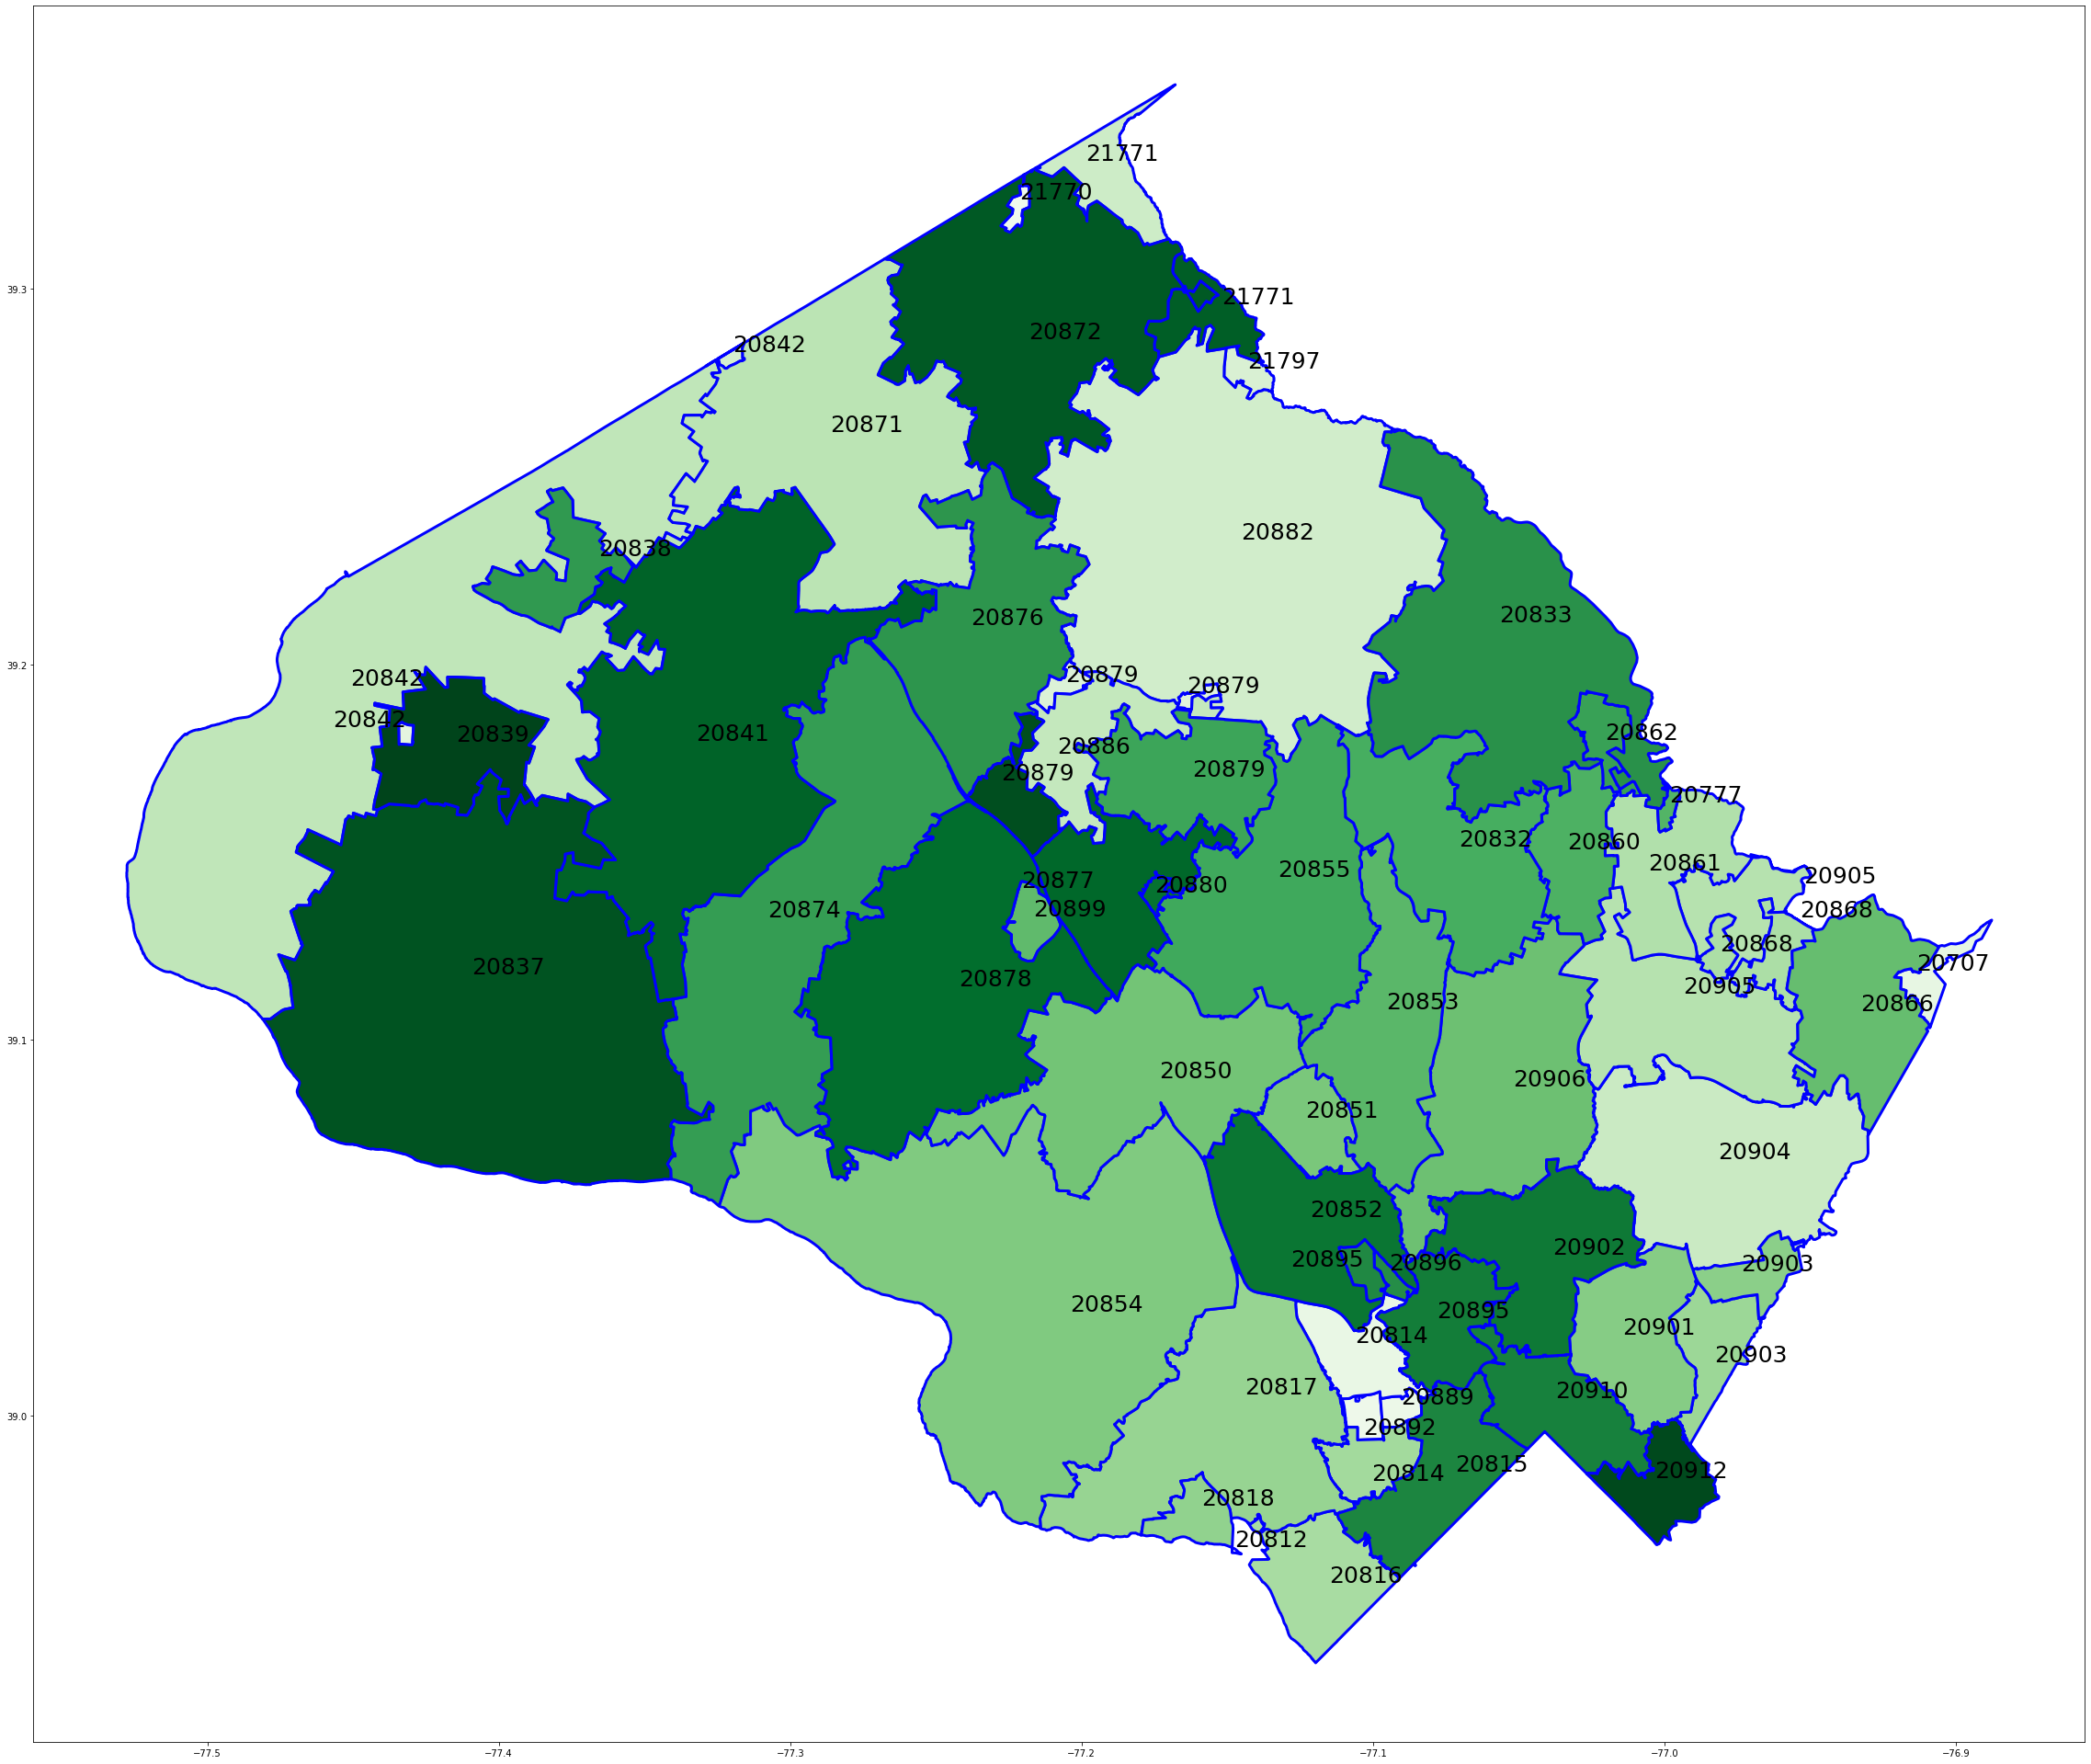

In [47]:
mcZip.plot(figsize=(40, 40), cmap='Greens', edgecolor='blue', linewidth=3)

texts = []

for x, y, label in zip(mcZip.center.x, mcZip.center.y, mcZip['ZIPCODE']):
  texts.append(plt.text(x, y, label, fontsize = 25))

aT.adjust_text(texts, force_points=(0.2, 0), force_text=(0.5, 0), expand_points=(1,1), expand_text=(1,1))
               #arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.show()

In [48]:
mcZipCodes = mcZip['ZIPCODE'].unique()

In [49]:
mcZipCodes.shape

(52,)

In [50]:
# Montgomery County Population by Zip Codes
mcZcta = mdZcta[mdZcta['ZCTA5N'].isin(mcZipCodes)]

In [51]:
mcZcta['ZCTA5N'].unique()

array([20707, 20777, 20812, 20814, 20815, 20816, 20817, 20818, 20832,
       20833, 20837, 20838, 20839, 20841, 20842, 20850, 20851, 20852,
       20853, 20854, 20855, 20860, 20861, 20862, 20866, 20868, 20871,
       20872, 20874, 20876, 20877, 20878, 20879, 20880, 20882, 20886,
       20895, 20896, 20899, 20901, 20902, 20903, 20904, 20905, 20906,
       20910, 20912, 21770, 21771, 21797])

In [52]:
mcZcta.head()

,OBJECTID_1,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,AREAWATR,POP100,HU100,NHW,NHB,NHAI,NHA,NHNH,NHO,NHT,HISP,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,POP65_,PCTPOP65_,MEDAGE,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P
62,63,20707,24,2420707,B5,G6350,S,20707,24,28896187,481328,31538,13576,9599,13425,72,2849,15,111,796,4671,30.4,42.6,0.2,9.0,0.0,0.4,2.5,14.8,2998,9.5,35.7,892,6.6,53.6,12.5,38.7,32.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
102,103,20777,24,2420777,B5,G6350,S,20777,24,19568844,110664,3314,1111,2692,155,10,274,2,2,79,100,81.2,4.7,0.3,8.3,0.1,0.1,2.4,3.0,428,12.9,45.6,27,2.4,76.3,20.1,4.5,7.7,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
111,112,20812,24,2420812,B5,G6350,S,20812,24,496734,371058,255,100,230,3,0,6,0,0,6,10,90.2,1.2,0.0,2.4,0.0,0.0,2.4,3.9,33,12.9,42.4,4,4.0,72.9,19.5,9.4,4.3,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
112,113,20814,24,2420814,B5,G6350,S,20814,24,13166146,52953,27642,14103,21021,1134,34,2572,20,74,695,2092,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,4508,16.3,40.3,838,5.9,40.5,27.7,43.9,14.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...
113,114,20815,24,2420815,B5,G6350,S,20815,24,14066048,35097,29082,13850,23357,1256,28,1804,13,90,702,1832,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,6002,20.6,45.4,759,5.5,45.4,28.9,36.2,13.5,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...


In [53]:
mcPop = mcZcta[['ZCTA5N', 'POP100']]
mcPop.head()

,ZCTA5N,POP100
62,20707,31538
102,20777,3314
111,20812,255
112,20814,27642
113,20815,29082


In [54]:
mcZipPop = pd.merge(mcZip, mcPop, left_on='ZIPCODE', right_on='ZCTA5N', how='left')
mcZipPop.head()

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,ZCTA5N,POP100
0,415,20868,SPENCERVILLE,MD,5.180459e+04,"POLYGON ((-76.94830 39.12929, -76.94831 39.129...",POINT (-76.95363 39.13169),20868.0,790.0
1,412,20812,GLEN ECHO,MD,2.387338e+05,"POLYGON ((-77.14515 38.96322, -77.14542 38.963...",POINT (-77.14747 38.96407),20812.0,255.0
2,417,20905,SILVER SPRING,MD,4.264496e+05,"MULTIPOLYGON (((-76.96727 39.14879, -76.96709 ...",POINT (-76.95223 39.14061),20905.0,18044.0
3,707,21770,MONROVIA,MD,5.994021e+06,"POLYGON ((-77.21802 39.32732, -77.21784 39.323...",POINT (-77.22139 39.32278),21770.0,5164.0
4,685,20892,BETHESDA,MD,1.383493e+07,"POLYGON ((-77.09662 38.99691, -77.09662 38.996...",POINT (-77.10323 38.99991),NaN,NaN


In [55]:
mcZipPop[mcZipPop['ZIPCODE']==20814]

,OBJECTID,ZIPCODE,POSTAL,STATE,SDEZIPCODE,geometry,center,ZCTA5N,POP100
6,688,20814,BETHESDA,MD,6.872786e+07,"POLYGON ((-77.09606 39.03256, -77.09537 39.032...",POINT (-77.10615 39.01850),20814.0,27642.0
23,818,20814,BETHESDA,MD,4.778888e+07,"POLYGON ((-77.09643 38.99518, -77.09643 38.995...",POINT (-77.10057 38.98763),20814.0,27642.0


In [56]:
mcZipPop['POP100'].describe()

count       61.000000
mean     20569.590164
std      17258.896168
min        142.000000
25%       3314.000000
50%      19054.000000
75%      29563.000000
max      64696.000000
Name: POP100, dtype: float64

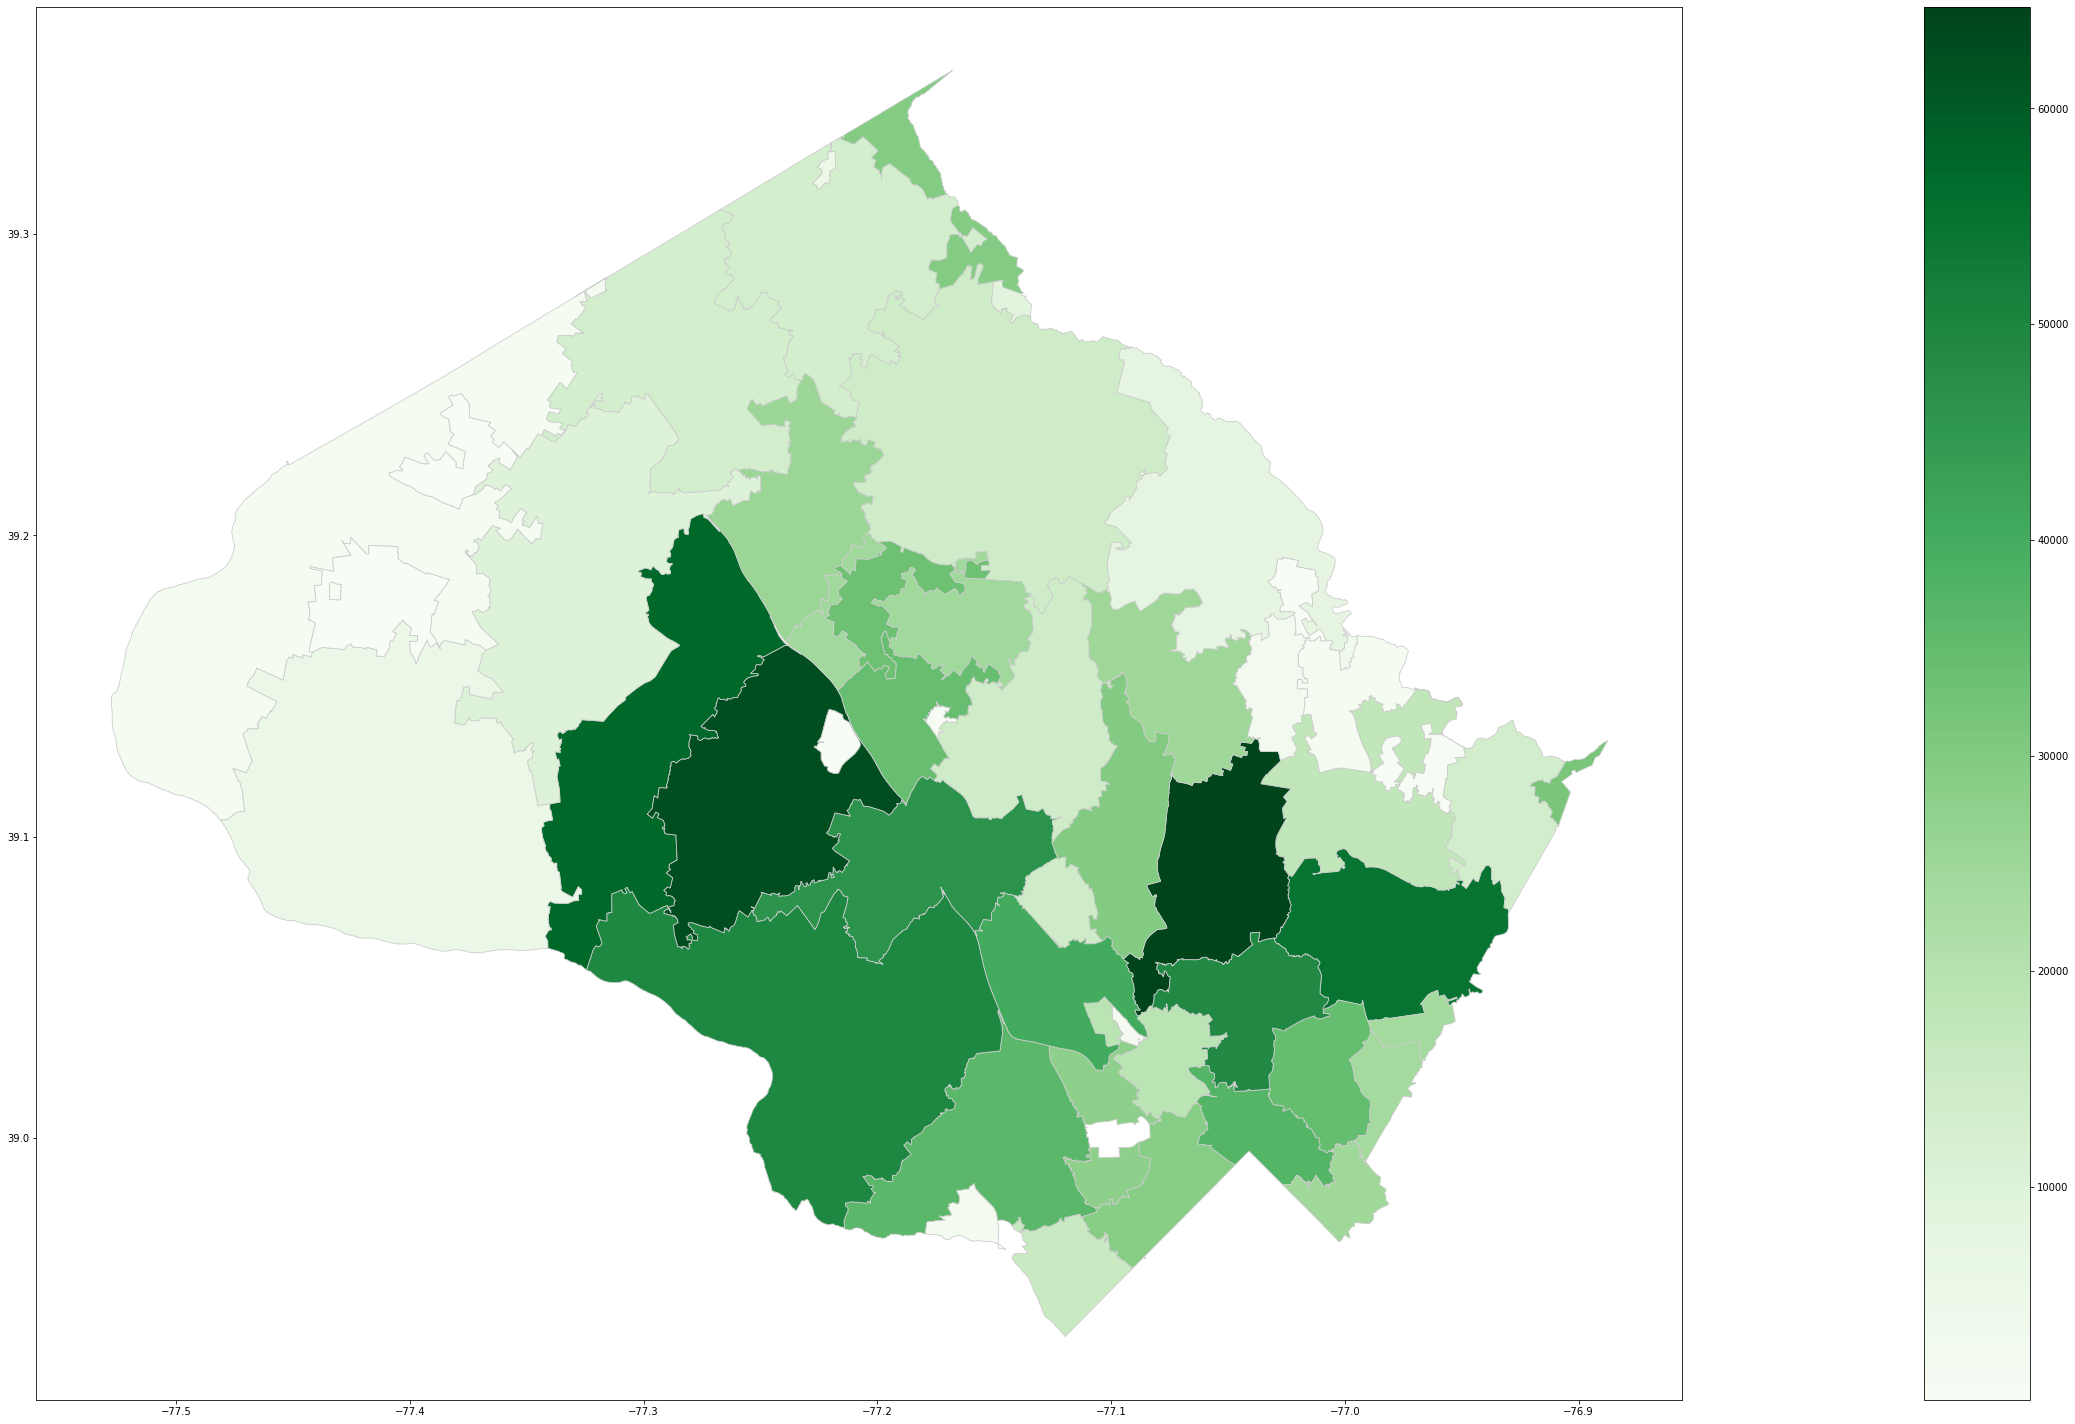

In [62]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(figsize=[40,40])

# create an axes on the right side of ax. 
# The width of cax will be 5% of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

mcZipPop.plot(column='POP100', cmap='Greens', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax, cax=cax)

plt.show()

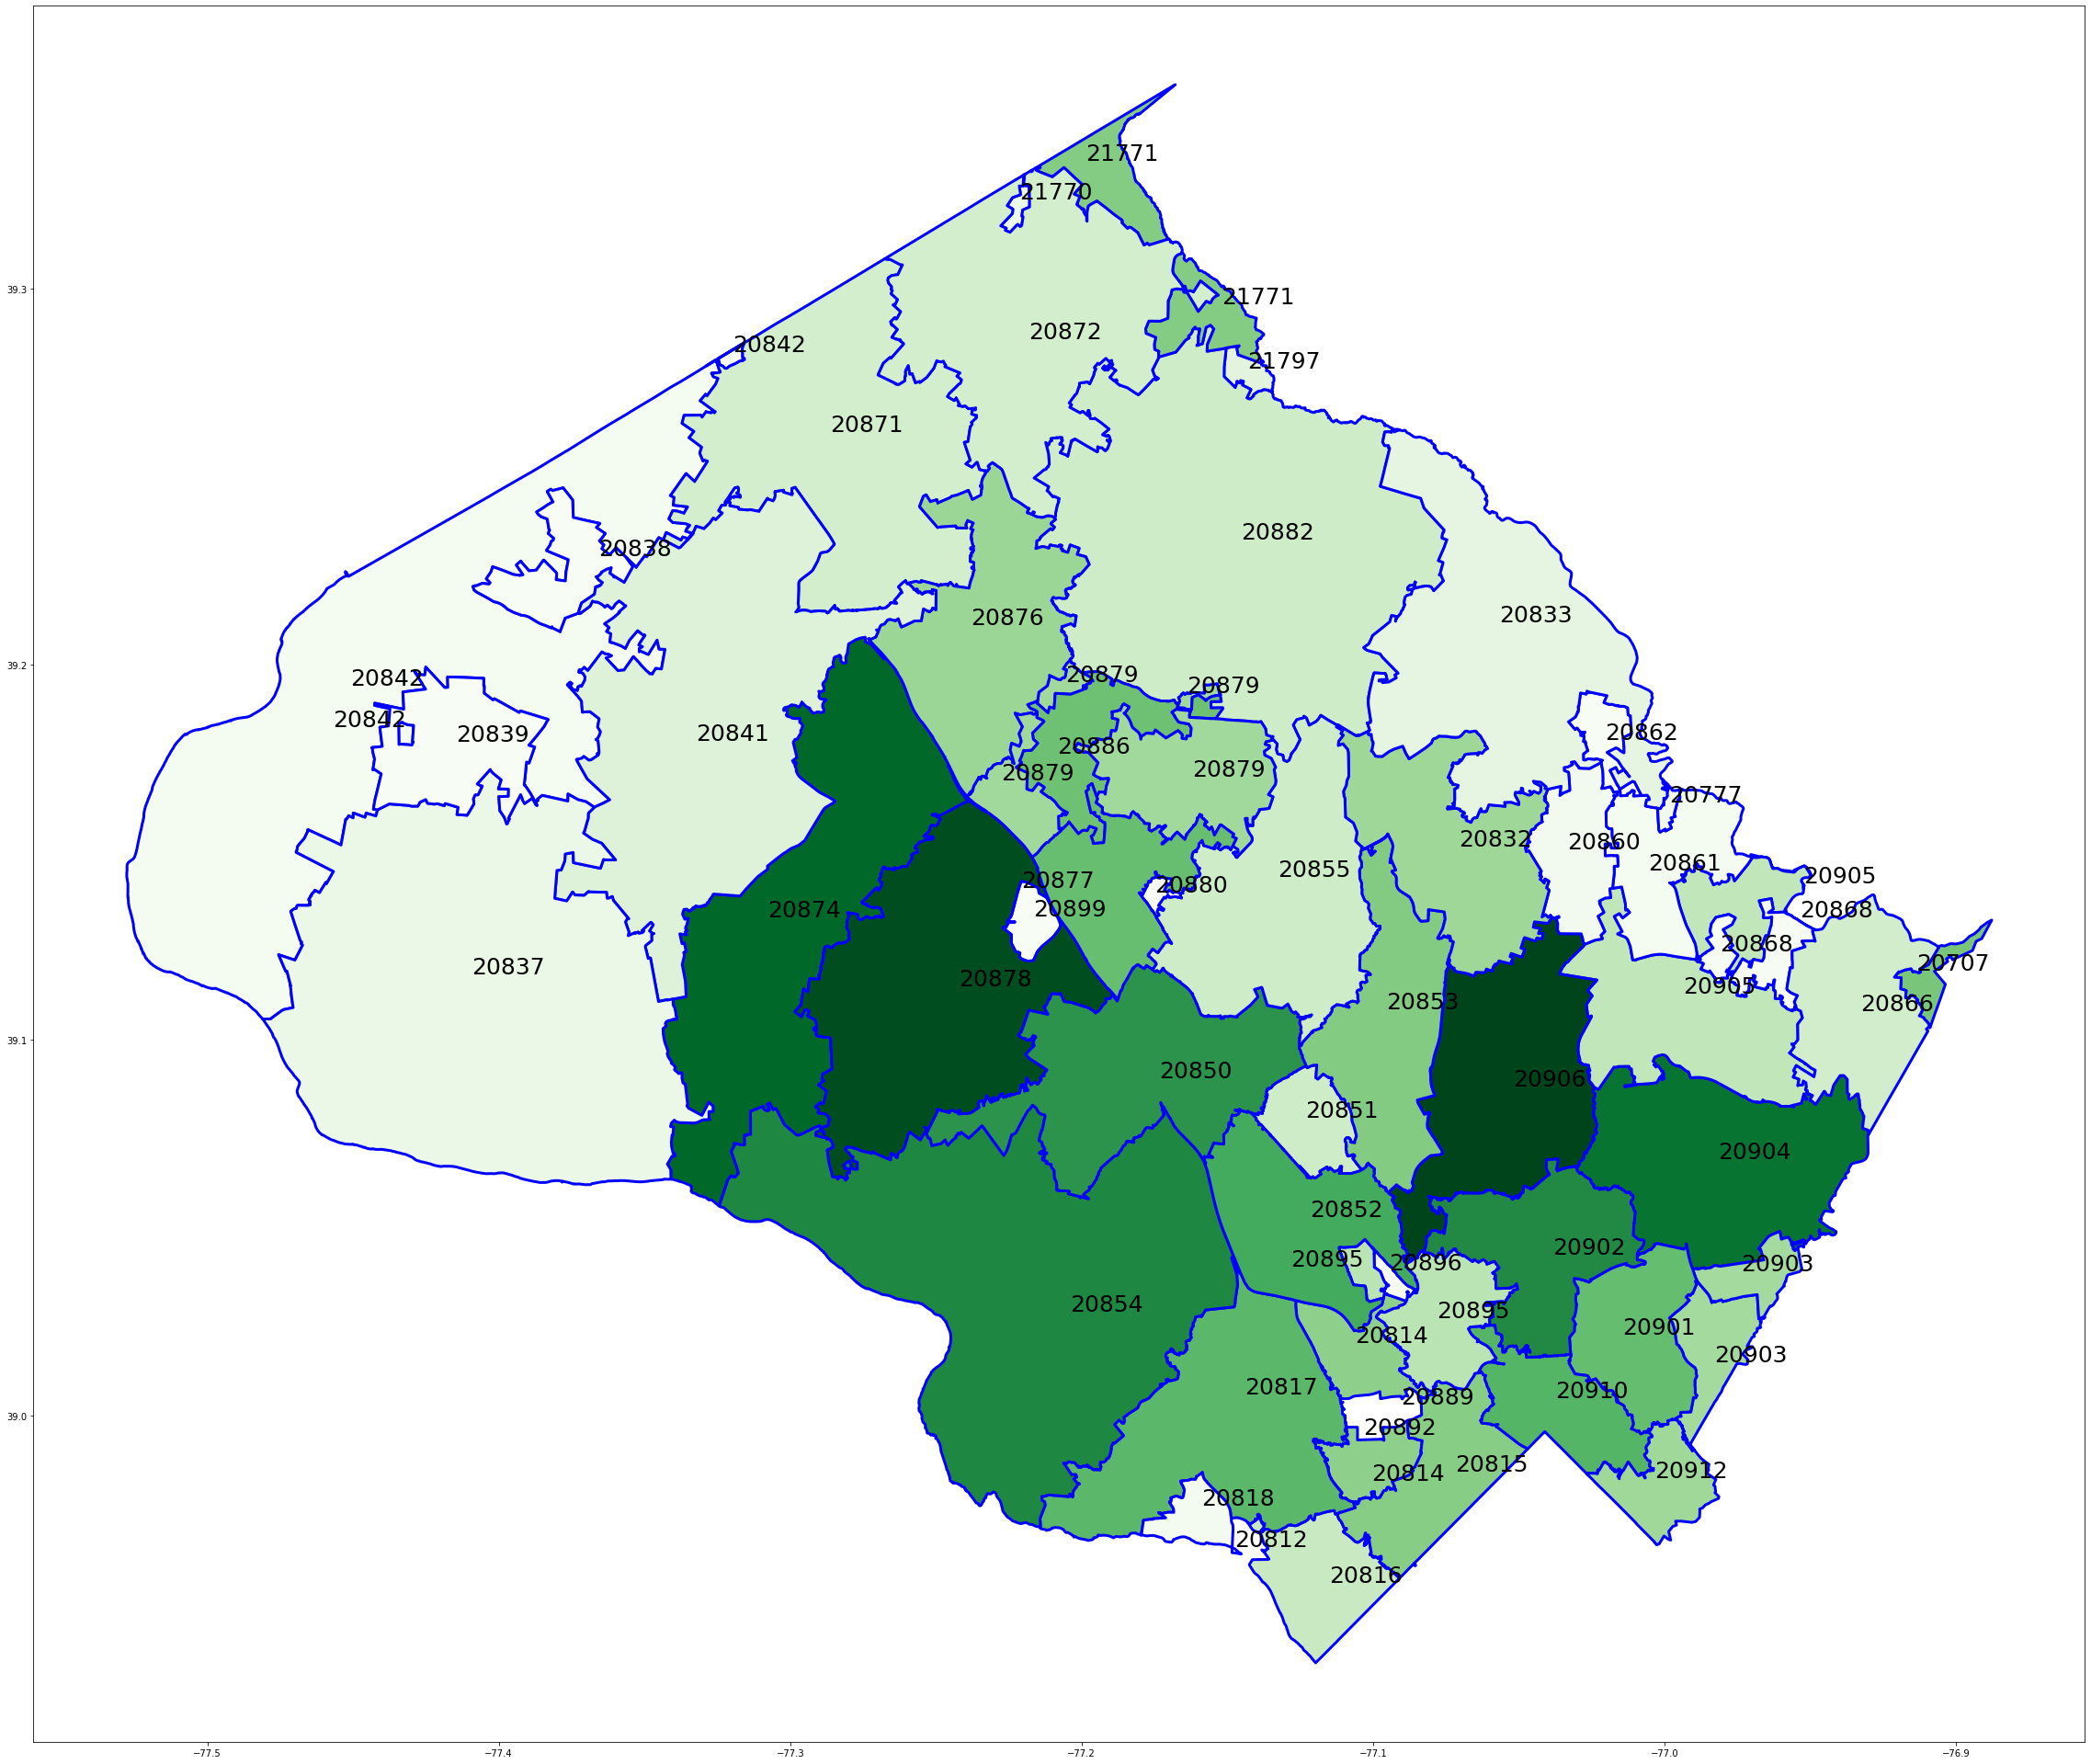

In [60]:
fig, ax = plt.subplots(figsize=[40,40])

#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='3%', pad=0.05)

mcZipPop.plot(column='POP100', cmap='Greens', edgecolor='blue', linewidth=3, ax=ax, cax=cax)

texts = []
for x, y, label in zip(mcZipPop.center.x, mcZipPop.center.y, mcZipPop['ZIPCODE']):
  texts.append(plt.text(x, y, label, fontsize = 25))

aT.adjust_text(texts, force_points=(0.2, 0), force_text=(0.5, 0), expand_points=(1,1), expand_text=(1,1))

plt.show()

In [61]:
mplcursors.cursor(hover=True)